   # LOGISTIC REGRESSION

In [3]:
#importing libararies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



The Data

The data is related with social network ads. The classification goal is to predict if they purchased (1/0) a term deposit (variable y).

In [9]:
data=pd.read_csv('E:\\Social_Network_Ads.csv')

In [46]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB


In [34]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [35]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In this dataset purchased is the dependent feature where are "userid, Gender, Age and EstimatedSalary" is the independent feature. We will not consider userid and gender in our model building as this is not expressing much with dependent variable.

In [36]:
#Split X and y

X=df.iloc[:,2:4]
y=df['Purchased']
print(X.shape)
print(y.shape)


(400, 2)
(400,)


In [37]:
#Split X and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [38]:
#Now we perfouniquethe feature scalling as Age and Estimated salary both having different range. If you don't do feature scalling then your
#Estimated salary will do dominent Age feature when the model finds the nearest neighbour to a datapoint in data space.

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [39]:
#Finally we make the model using logistic regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print(model_lr.intercept_)
print(model_lr.coef_)

[-0.93722653]
[[2.04534306 1.18128442]]


In [40]:
#Validate the model with X test and check the performance of the model using confusion metrix
from sklearn.metrics import confusion_matrix
y_predict=model_lr.predict(X_test)
print("Confusion Metrix for this model is: ")
print(confusion_matrix(y_test,y_predict))

Confusion Metrix for this model is: 
[[58  9]
 [ 6 27]]


In [41]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score is {accuracy_score(y_test,y_predict)}")

Accuracy Score is 0.85


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


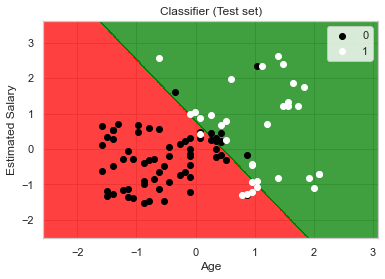

In [42]:
#Now we have to visualize the performance of our model test dataset
from matplotlib.colors import ListedColormap
x_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,model_lr.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


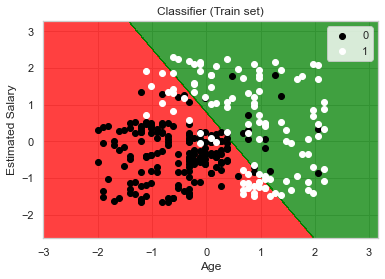

In [43]:
#Now we have to visualize the performance of our model train dataset

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,model_lr.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
      
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

From the above graph it is clear visible the line which divides green and red line.

**Green Line : Purchased SUV cars**

**red Line : Didn't purchase SUV cars**

Here X-axis gives Age and Y-axis gives the esimated salary. The graph plots the dependent variable data point purchased based on this two independent variables

Data Points lies on green area is purchased SUV car. Where are data points lies on red area is not purchased SUV car.

Older age is having high estimated salary purchased more SUV where as younger age having less salary is not purchased SUV car.

Here few black points are lying on red area and few white points are lying on green area. That means few younger age people having high estimated salary and purchased SUV where as few older age people having less salary is not purchasing SUV